# Accessing Data for Save the Children Data Dive

This jupyter notebook goes through a few helpful tips for accessing humanitarian data and getting started on visualizations.

1. Accessing data from Humanitarian Data Exchange (https://data.humdata.org/) through API (more information can be found here: https://hdx-python-api.readthedocs.io/en/latest/
2. Accessing data from Humanitarian Data Exchange for URL
3. Accessing data from database
4. Quick analysis and visualizations
5. Quick mapping

### Packages

In [24]:
# basics and accesing data
#import pathlib
import pandas as pd
import requests

# accessing data from HDX with API
from hdx.utilities.easy_logging import setup_logging
from hdx.api.configuration import Configuration
from hdx.data.dataset import Dataset

# quick visualization and analysis
#from matplotlib import pyplot as plt
#import numpy as np
#import seaborn as sns

# mapping
import geopandas as geo #may also need fiona and pyproj
import folium
import math

### 1. Accesing Data from HDX with API

This is one possible way of accessing data. It's a bit clunky and only seems to download the first resources on a page. There seem to be some issues in downloading geospatial data. 

In [3]:
setup_logging()
Configuration.create(hdx_site="prod", user_agent="Save", hdx_read_only=True) #if just reading data, don't need API key

ConfigurationError: Configuration already created!

In [7]:
#name of dataset is in url of page of dataset: https://data.humdata.org/dataset/somalia-health-facilities-data
dataset = Dataset.read_from_hdx("somalia-health-facilities-data")
resources = Dataset.get_all_resources([dataset])
url, path = resources[0].download() #saves file to computer
print("Resource URL %s downloaded" % (url))

health = pd.read_excel(path, skiprows = [1])
health

Resource URL https://data.humdata.org/dataset/9fd710d4-ab87-43c9-b6da-39847af345b1/resource/3bc1cf5a-a46d-47a5-8f7f-93789f5db5b9/download/health-facilities.xlsx downloaded


,Region,District,Health Facility name,Type:,Latiitude,Longititude
0,Banadir,Hodan,ACF HC/OTP,Health Center (HC),NaN,NaN
1,Banadir,Kahda,MCH AAH,Health Center (HC),2.058555,45.264153
2,Banadir,Waberi,Elgab Health Center,Health Center (HC),2.059934,45.328092
3,Banadir,Waberi,Waberi Health Center,Health Center (HC),2.048110,45.325662
4,Nugaal,Garoowe,Baxnaano Health Center,Health Center (HC),NaN,NaN
...,...,...,...,...,...,...
514,Hiraan,Bulo Burto,October Wardi Health Center,Health Center (HC),NaN,NaN
515,Hiraan,Belet Weyne,Wardi Ceel-jaale Health Centre,Health Center (HC),NaN,NaN
516,Lower Shabelle,Wanla Weyn,Wanla Weyn Wardi MCH,NaN,NaN,NaN
517,Banadir,Dharkeynley,Test 123,Hospital,NaN,NaN


### Accessing data from Humanitarian Data Exchange for URL

This is a more reliable way of accessing data from HDX
URL for resources can be found by clicking 'More' -> 'Previous on HDX' and using URL that appears on the new wepage or by right clicking 'Download' -> 'Copy Link'.

In [10]:
# example of geospatial file
URL = "https://data.humdata.org/dataset/ec140a63-5330-4376-a3df-c7ebf73cfc3c/resource/6f42e9ce-bbca-4c0d-a3e6-85efc9298c3c/download/som-administrative-divisions-shapefiles.zip"
response = requests.get(URL)
open("geo.zip", "wb").write(response.content)

372789

In [19]:
# example of tabular data
URL2 = "https://data.humdata.org/dataset/6c4c69cf-8ca0-4bfc-8c46-73cdb18812d5/resource/d52e624e-87c8-40cd-bf82-27d37da0fb93/download/2021-post-gu-amn-burden-and-prevalence-9-sep-2021.xlsx"
mal_nu = pd.read_excel(URL2, skiprows = 1)
mal_nu

,Unnamed: 0,District,Under-Five Population,GAM,SAM,GAM Prevalence,SAM Prevalence
0,Adan Yabaal,Adan Yabaal,1.719000e+04,4930,710,0.110306,0.015886
1,Afgooye,Afgooye,9.444460e+04,43800,8930,0.178371,0.036366
2,Afmadow,Afmadow,4.670380e+04,18290,4150,0.150622,0.034176
3,Baardheere,Baardheere,3.445340e+04,13330,2230,0.148807,0.024894
4,Badhaadhe,Badhaadhe,1.427260e+04,5790,1330,0.156028,0.035841
...,...,...,...,...,...,...,...
70,Xarardheere,Xarardheere,1.385960e+04,3720,360,0.103233,0.009990
71,Xudun,Xudun,1.621940e+04,3340,240,0.079202,0.005691
72,Xudur,Xudur,1.945040e+04,8700,1890,0.172035,0.037373
73,Zeylac,Zeylac,1.124640e+04,2690,340,0.091995,0.011628


In [20]:
#get previously downloaded regional boundaries (unzipped file from geospatial data downloaded above)
gdf = geo.read_file(r'som-administrative-divisions-shapefiles\Som_Admbnda_Adm2_UNDP.shp')
#can merge geospatial data with other tables
gdf = gdf.merge(mal_nu, how = 'left', left_on = 'admin2Name', right_on = 'District')
gdf

##ADD- zipped file to geo

,OBJECTID_1,admin2Name,admin2Pcod,admin2RefN,admin2AltN,admin2Al_1,admin1Name,admin1Pcod,admin0Name,admin0Pcod,...,Shape_Leng,Shape_Area,geometry,Unnamed: 0,District,Under-Five Population,GAM,SAM,GAM Prevalence,SAM Prevalence
0,1,Banadir,SO2201,Banadir,None,None,Banadir,SO22,Somalia,SO,...,0.864205,0.019619,"POLYGON ((45.61720 2.18585, 45.61871 2.18601, ...",Banadir,Banadir,536662.400000,252820.0,48480.0,0.181191,0.034745
1,2,Borama,SO1101,Borama,Boorama,None,Awdal,SO11,Somalia,SO,...,2.403698,0.254798,"POLYGON ((43.35094 10.05094, 43.33094 9.84096,...",Borama,Borama,73034.200000,20250.0,3930.0,0.106641,0.020696
2,3,Baki,SO1102,Baki,None,None,Awdal,SO11,Somalia,SO,...,2.871573,0.282360,"POLYGON ((44.23660 10.47312, 44.15096 10.32091...",Baki,Baki,11187.800000,3470.0,640.0,0.119292,0.022002
3,4,Lughaye,SO1103,Lughaye,None,None,Awdal,SO11,Somalia,SO,...,2.334272,0.275737,"POLYGON ((44.07241 10.59786, 43.46094 10.38091...",Lughaye,Lughaye,12173.400000,3020.0,410.0,0.095416,0.012954
4,5,Zeylac,SO1104,Zeylac,Saylac,None,Awdal,SO11,Somalia,SO,...,3.852047,0.499583,"MULTIPOLYGON (((43.46797 11.42739, 43.45518 11...",Zeylac,Zeylac,11246.400000,2690.0,340.0,0.091995,0.011628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,Saakow,SO2703,Saakow,Sakow,None,Middle Juba,SO27,Somalia,SO,...,3.868911,0.654011,"POLYGON ((42.95330 1.48243, 42.23090 1.51171, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,71,Kismaayo,SO2801,Kismaayo,Kismayo,None,Lower Juba,SO28,Somalia,SO,...,5.532878,0.749813,"MULTIPOLYGON (((42.03180 -1.01986, 42.02406 -1...",Kismayo,Kismaayo,60740.000000,23900.0,5880.0,0.151339,0.037233
71,72,Afmadow,SO2802,Afmadow,None,None,Lower Juba,SO28,Somalia,SO,...,5.871596,2.174108,"POLYGON ((41.00146 -0.19648, 40.99565 -0.19731...",Afmadow,Afmadow,46703.800000,18290.0,4150.0,0.150622,0.034176
72,73,Badhaadhe,SO2803,Badhaadhe,Badhadhe,None,Lower Juba,SO28,Somalia,SO,...,4.657717,0.793048,"MULTIPOLYGON (((41.92670 -1.16192, 41.92260 -1...",Badhaadhe,Badhaadhe,14272.600000,5790.0,1330.0,0.156028,0.035841


### Accessing data from database

If necessary, go to https://ipchicken.com/ and let event organizers know your ip address. The rest of the access information will be provided to you

In [ ]:
"""
database = 
user = 
password =
host = 
port = 5432
table = 
"""
conn = psycopg2.connect(database=database, user = user, password= password, host= host, port= port)
cursor = conn.cursor()

q = 'SELECT * FROM '+ table #can add 'LIMIT 10' to get first 10 columns
cursor.execute(q)
s = cursor.fetchall()

#can transfer output into dataframe for further analysis
df = pd.DataFrame(s)
df.to_csv('example.csv')

#how to get geo information from cursor.fetchall()??

### Quick analysis and visualizations

<AxesSubplot:xlabel='GAM Prevalence', ylabel='SAM Prevalence'>

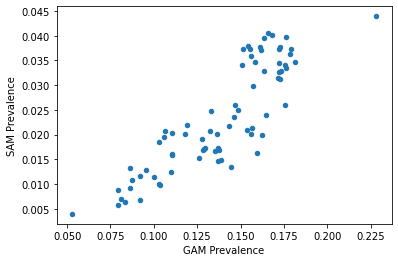

In [32]:
mal_nu.plot.scatter(x = 'GAM Prevalence', y = 'SAM Prevalence')

### Quick mapping

Folium (http://python-visualization.github.io/folium/quickstart.html) is a great place to start for visualization within Python.

In [25]:
locations = health[['Latiitude', 'Longititude']]
locationlist = locations.values.tolist()

m = folium.Map(location=[5.1521, 46.1996], zoom_start=6 , tiles=None, zoom_control = False)
#create base map
base_map = folium.FeatureGroup(name='Basemap', overlay=True)
folium.TileLayer(tiles='cartodbpositron').add_to(base_map)
base_map.add_to(m)

#make label info
toolTip = {}
toolTip['GAM Prevalence'] = ['admin2Name', 'GAM Prevalence', 'SAM Prevalence']
toolTip['SAM Prevalence'] = ['admin2Name', 'GAM Prevalence', 'SAM Prevalence']

    
#make layers
layers = ['GAM Prevalence', 'SAM Prevalence']
for l in layers:
    print(l)
    # plot chorpleth over the base map
    cp = folium.Choropleth(gdf,                                # geo data
                      data=gdf,                           # data
                      key_on='feature.properties.admin2Name',
                      columns=['admin2Name', l],
                      fill_color='RdPu',                     # cmap
                      line_weight=0.1,                       # line wight (of the border)
                      line_opacity=0.5,                      # line opacity (of the border)
                      overlay = False,
                      legend_name = l,
                      name =  l
                      ).add_to(m)    # name on the legend color bar
    folium.GeoJsonPopup(toolTip[l]).add_to(cp.geojson) #add information for each geoid

for point in range(0, len(locationlist)):
    if not math.isnan(locationlist[point][0]) and not math.isnan(locationlist[point][1]):
        folium.Marker(locationlist[point], popup=health['Health Facility name'][point]).add_to(m)
    
# add layer controls
folium.LayerControl().add_to(m)
m

GAM Prevalence
SAM Prevalence
